In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import json

if not os.path.exists(os.path.join(os.getcwd(), 'config.json')):
  # preventing to go always to the parent folder everytime we run the jupyter notebook without restarting
  os.chdir("..")
if not os.getcwd() in sys.path:
  sys.path.append(os.getcwd())

from analysis.analysis_commons import *
from strategies import *

# Main config
config = None
with open('config.json') as config_file:
  config = json.load(config_file)

In [2]:
# ---------------------------------------------------
config["database"]["database"] = "wikilite" # WIKILITE
# ---------------------------------------------------

# topic = 'Bayesian Statistics vs Frequentist Statistics'
# topic = 'Declarative Language vs Procedural Language'
topic = 'Optimism vs Pessimism'
# topic = 'Individualism vs Collectivism'

config["topic_name"] = topic

runs = 5 

outputs = {} 

with open('data/datavoids_per_topic_filtered.json', 'r') as f:
  datavoids_per_topic = json.load(f)
  check_repeated_keys(datavoids_per_topic)

  mitigator_id = datavoids_per_topic[topic]['mitigator_id']
  disinformer_id = datavoids_per_topic[topic]['disinformer_id']
  mitigator_label = label_for_topic(datavoids_per_topic[topic]['mitigator'])
  disinformer_label = label_for_topic(datavoids_per_topic[topic]['disinformer'])
  datavoids = datavoids_per_topic[topic]['datavoids']

config = clone_config_with_target(config, mitigator_label, disinformer_label, mitigator_id, disinformer_id)

config['datavoids'] = [ datavoids ]
print("Datavoids:", config['datavoids'])
keyword = config["datavoids"][0]
if isinstance(keyword, list):
  keyword = "|".join(keyword)

groups_count = prepare_db(config, force_preparation=False)
print(groups_count)

delayed_response_steps = 3 
max_steps = min([c for _, c in groups_count.items()])
steps_delay = max(1, max_steps // delayed_response_steps) 
print('Steps delay', steps_delay)

Datavoids: [['nihilism', 'affective', 'pessimism', 'depressive', 'adolescents', 'innate', 'pessimistic', 'coping', 'psychologists', 'optimism', 'metaphysical', 'perceive']]
Group names are the same in both databases. No further action needed.
Labeling started
Labeling opt / pes
 Target nodes: 47487167 24743
Groups count:
  opt: 133
  pes: 119
  opt|pes: 18
Groups count:
  opt: 133
  pes: 119
  opt|pes: 18
Groups count:
  pes: 135
  opt: 135
Done
{'None': 65588, 'pes': 135, 'opt': 135}
Steps delay 45


str RandomStrategy
str RandomStrategy


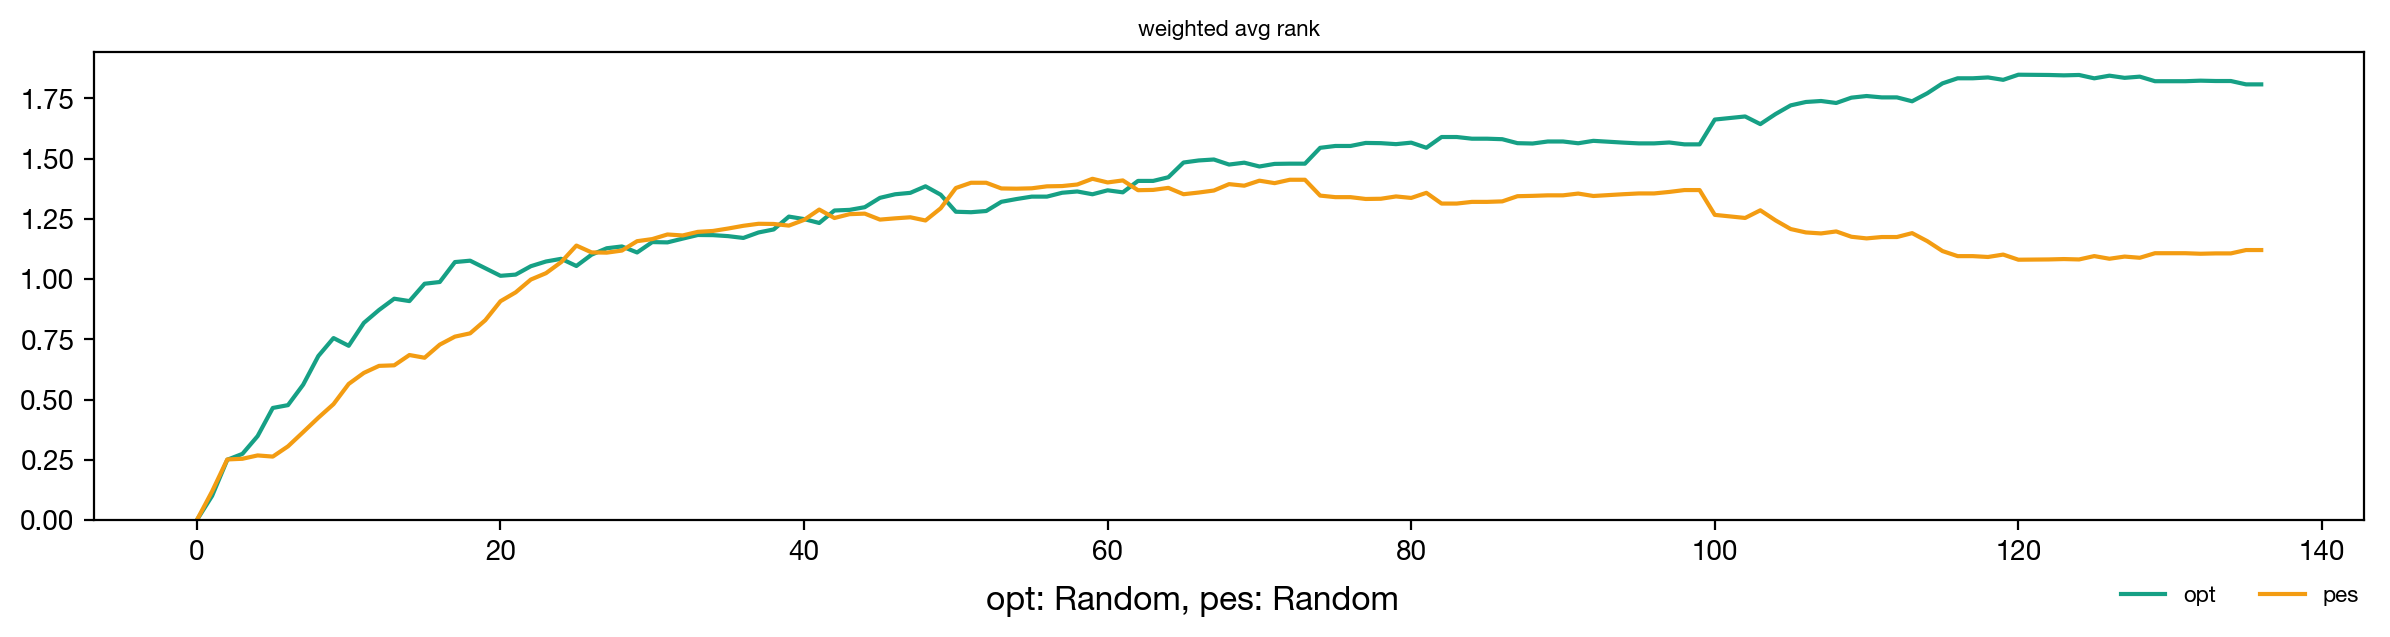

In [3]:
disinformer_strategy = RandomStrategy(config["datavoids"][0])
mitigator_strategy = RandomStrategy(config["datavoids"][0])
base_output = run_simple_simulation(
  keyword, 
  mitigator_strategy, 
  disinformer_strategy, 
  'delayed_strategy_choice_' + disinformer_strategy.get_strategy_name() + '_' + mitigator_strategy.get_strategy_name(), 
  config,
  number_of_runs=20,
  mute_output=True,
  delete_results_if_exist=True
)
outputs["rnd_rnd"] = base_output
steps_per_strategy_base, strategies_base, id_max_rank_base = get_output(config, base_output)
plot_results_for_datavoids_steps_per_strategy(
  strategies_base[0], 
  config["datavoids"][0], 
  datavoids_steps_per_strategy_base, 
  config, 
  filter_groups=['None']
)

str DelayedStartStrategy
str RandomStrategy


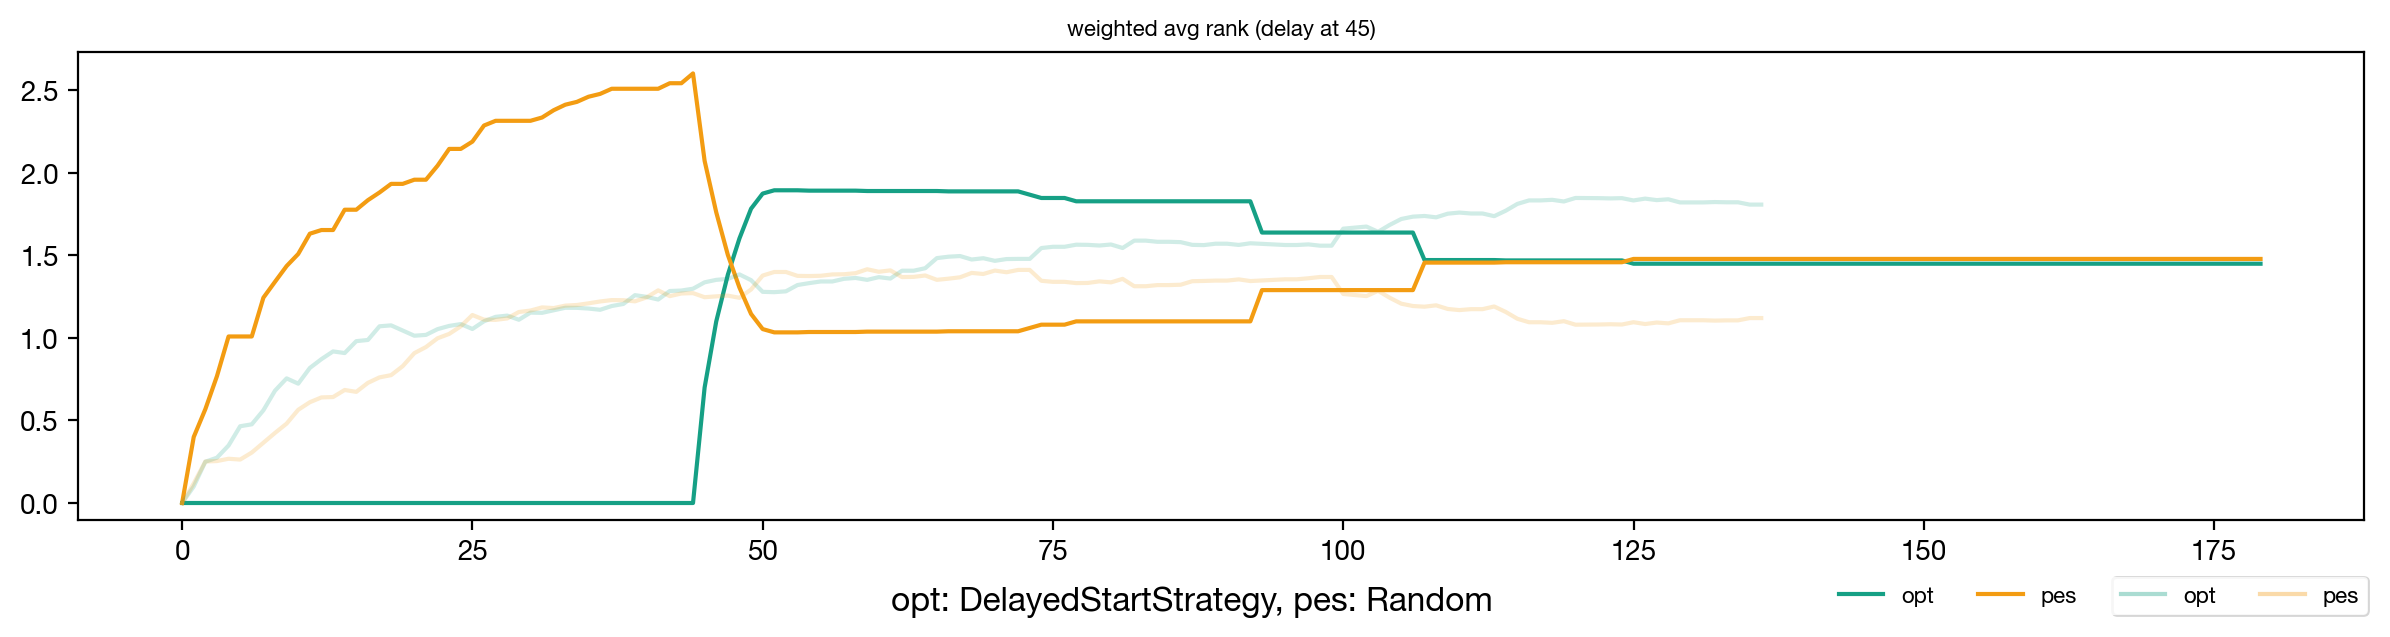

In [4]:
disinformer_strategy = RandomStrategy(config["datavoids"][0])
mitigator_strategy = DelayedStartStrategy(GreedyStrategy(config["datavoids"][0]), steps_delay)
output = run_simple_simulation(
  keyword, 
  mitigator_strategy, 
  disinformer_strategy, 
  'delayed_strategy_choice_step' + str(steps_delay) + '_' + disinformer_strategy.get_strategy_name() + '_' + mitigator_strategy.get_strategy_name(), 
  config,
  mute_output=True,
  number_of_runs=runs,
  delete_results_if_exist=True
)
steps_per_strategy, strategies, _ = get_output(config, output)
steps_per_strategy_base, strategies_base, _ = get_output(config, outputs["rnd_rnd"])
plot_results_for_datavoids_steps_per_strategy_and_base(
  strategies[0], 
  strategies_base[0], 
  config["datavoids"][0], 
  datavoids_steps_per_strategy, 
  datavoids_steps_per_strategy_base, 
  steps_per_strategy,
  steps_per_strategy_base,
  config,
  title_extra= f'(delay at {steps_delay})'
)


str DelayedStartStrategy
str RandomStrategy


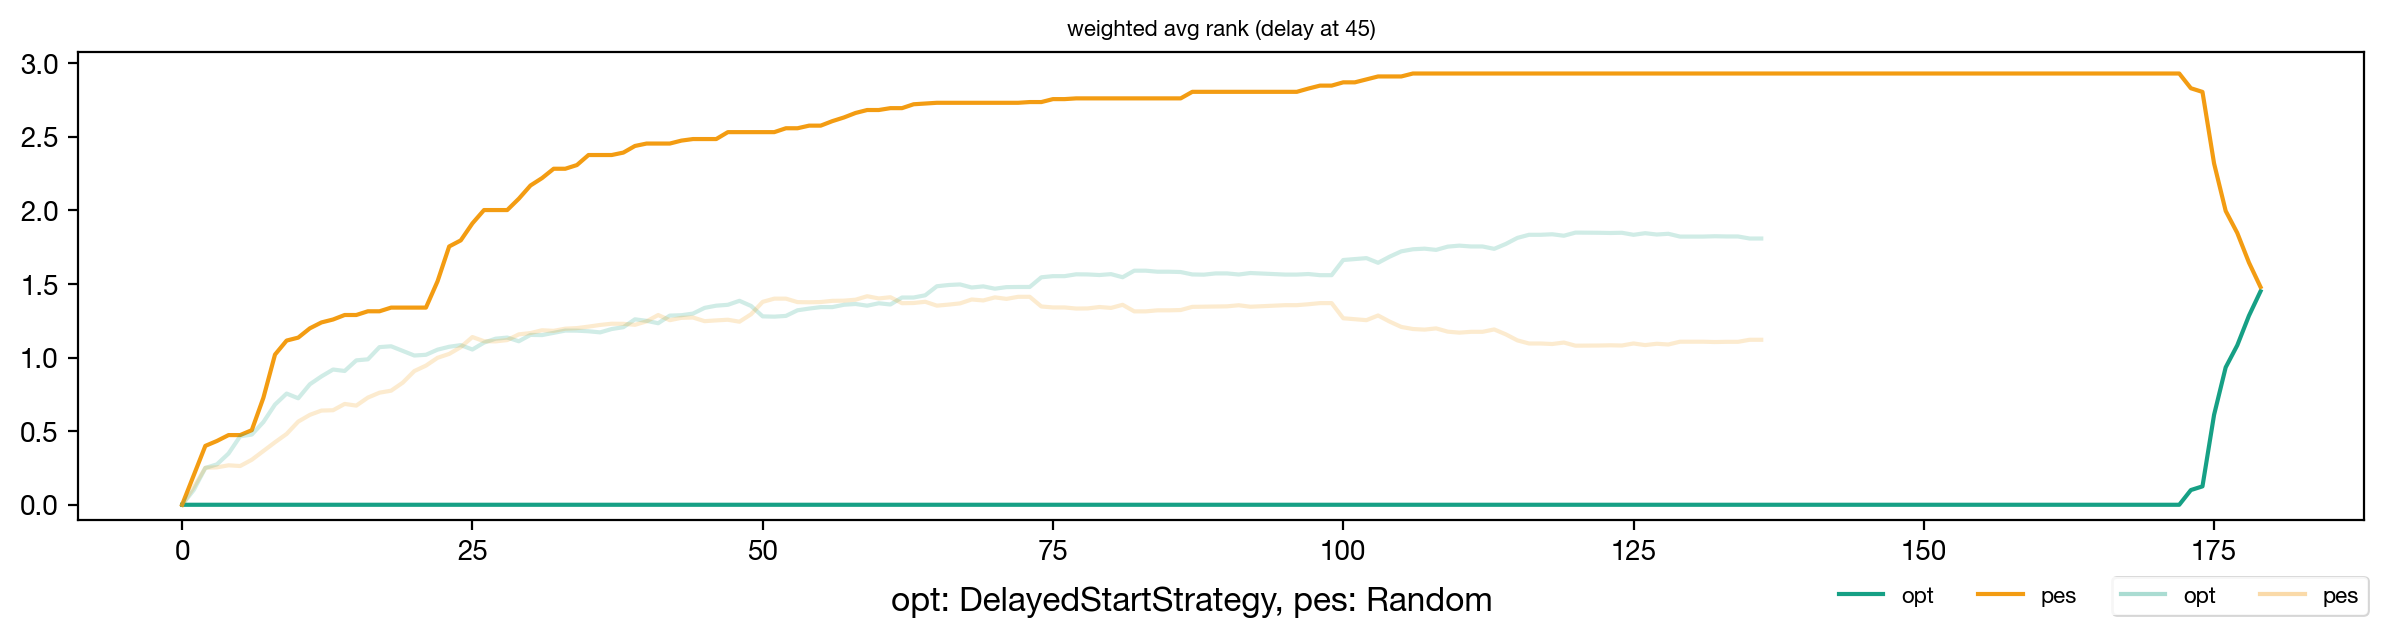

In [5]:
disinformer_strategy = RandomStrategy(config["datavoids"][0])
mitigator_strategy = DelayedStartStrategy(RevGreedyStrategy(config["datavoids"][0]), steps_delay)
output = run_simple_simulation(
  keyword, 
  mitigator_strategy, 
  disinformer_strategy, 
  'delayed_strategy_choice_step' + str(steps_delay) + '_' + disinformer_strategy.get_strategy_name() + '_' + mitigator_strategy.get_strategy_name(), 
  config,
  mute_output=True,
  number_of_runs=runs,
  delete_results_if_exist=True
)
steps_per_strategy, strategies, _ = get_output(config, output)
steps_per_strategy_base, strategies_base, _ = get_output(config, outputs["rnd_rnd"])
plot_results_for_datavoids_steps_per_strategy_and_base(
  strategies[0], 
  strategies_base[0], 
  config["datavoids"][0], 
  datavoids_steps_per_strategy, 
  datavoids_steps_per_strategy_base, 
  steps_per_strategy,
  steps_per_strategy_base,
  config,
  title_extra= f'(delay at {steps_delay})'
)

str DelayedStartStrategy
str RandomStrategy


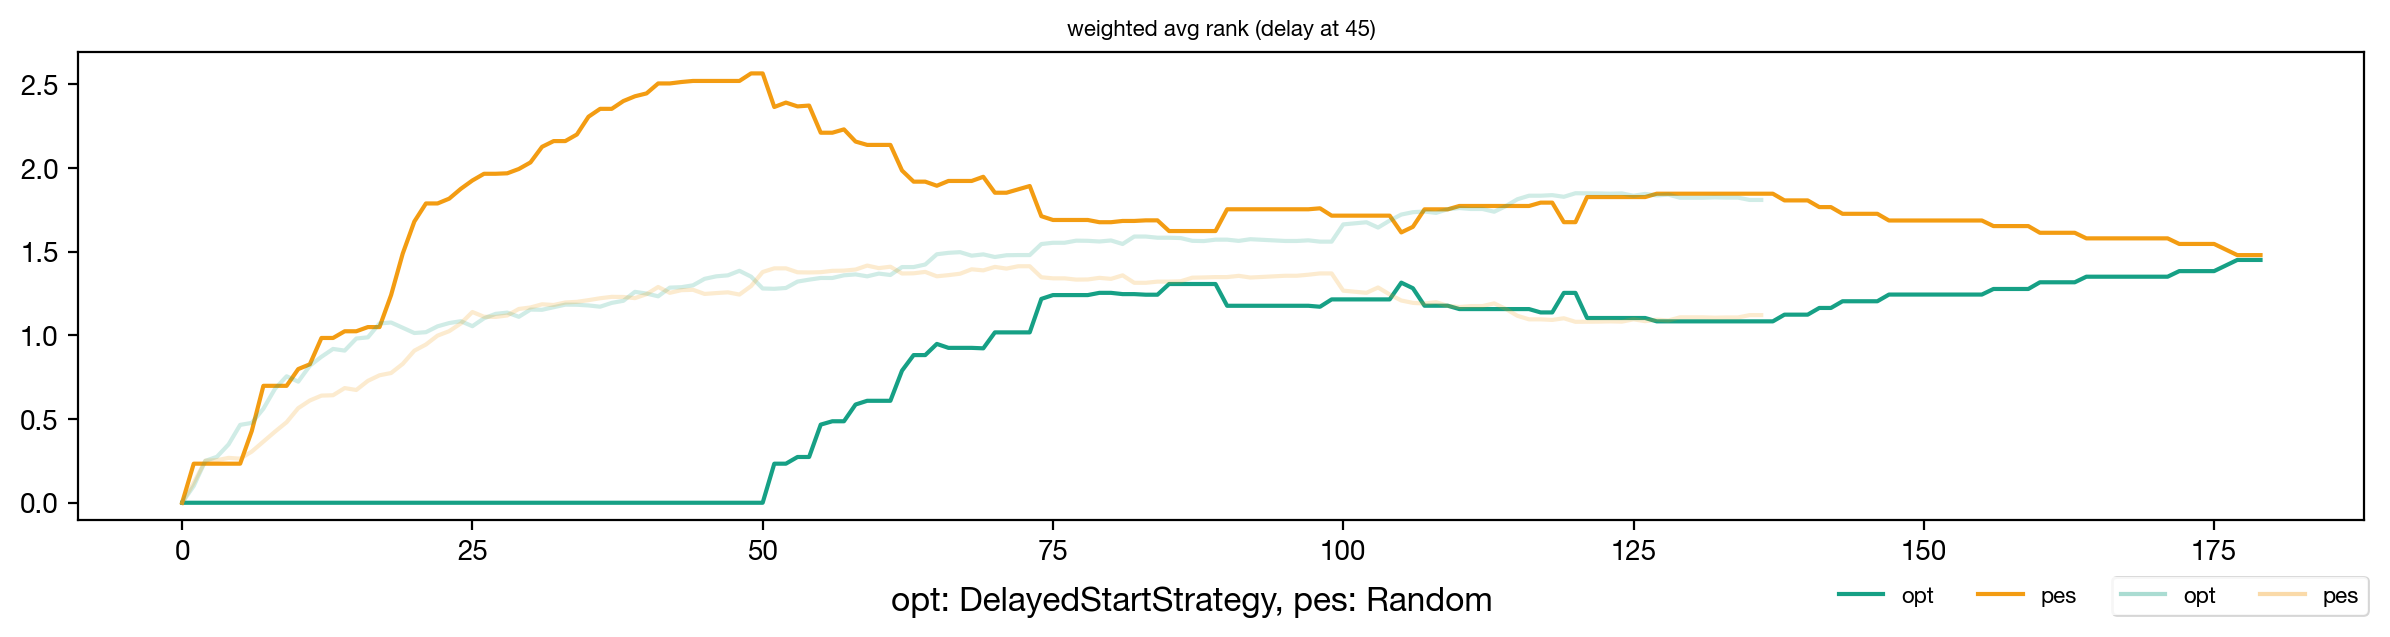

In [6]:
disinformer_strategy = RandomStrategy(config["datavoids"][0])
mitigator_strategy = DelayedStartStrategy(RandomStrategy(config["datavoids"][0]), steps_delay)
output_name = run_simple_simulation(
  keyword, 
  mitigator_strategy, 
  disinformer_strategy, 
  'delayed_strategy_choice_step' + str(steps_delay) + '_' + disinformer_strategy.get_strategy_name() + '_' + mitigator_strategy.get_strategy_name(), 
  config,
  mute_output=True,
  number_of_runs=runs,
  delete_results_if_exist=True
)
steps_per_strategy, strategies, _ = get_output(config, output_name)
steps_per_strategy_base, strategies_base, _ = get_output(config, outputs["rnd_rnd"])
plot_results_for_datavoids_steps_per_strategy_and_base(
  strategies[0], 
  strategies_base[0], 
  config["datavoids"][0], 
  datavoids_steps_per_strategy, 
  datavoids_steps_per_strategy_base, 
  steps_per_strategy,
  steps_per_strategy_base,
  config,
  title_extra= f'(delay at {steps_delay})'
)

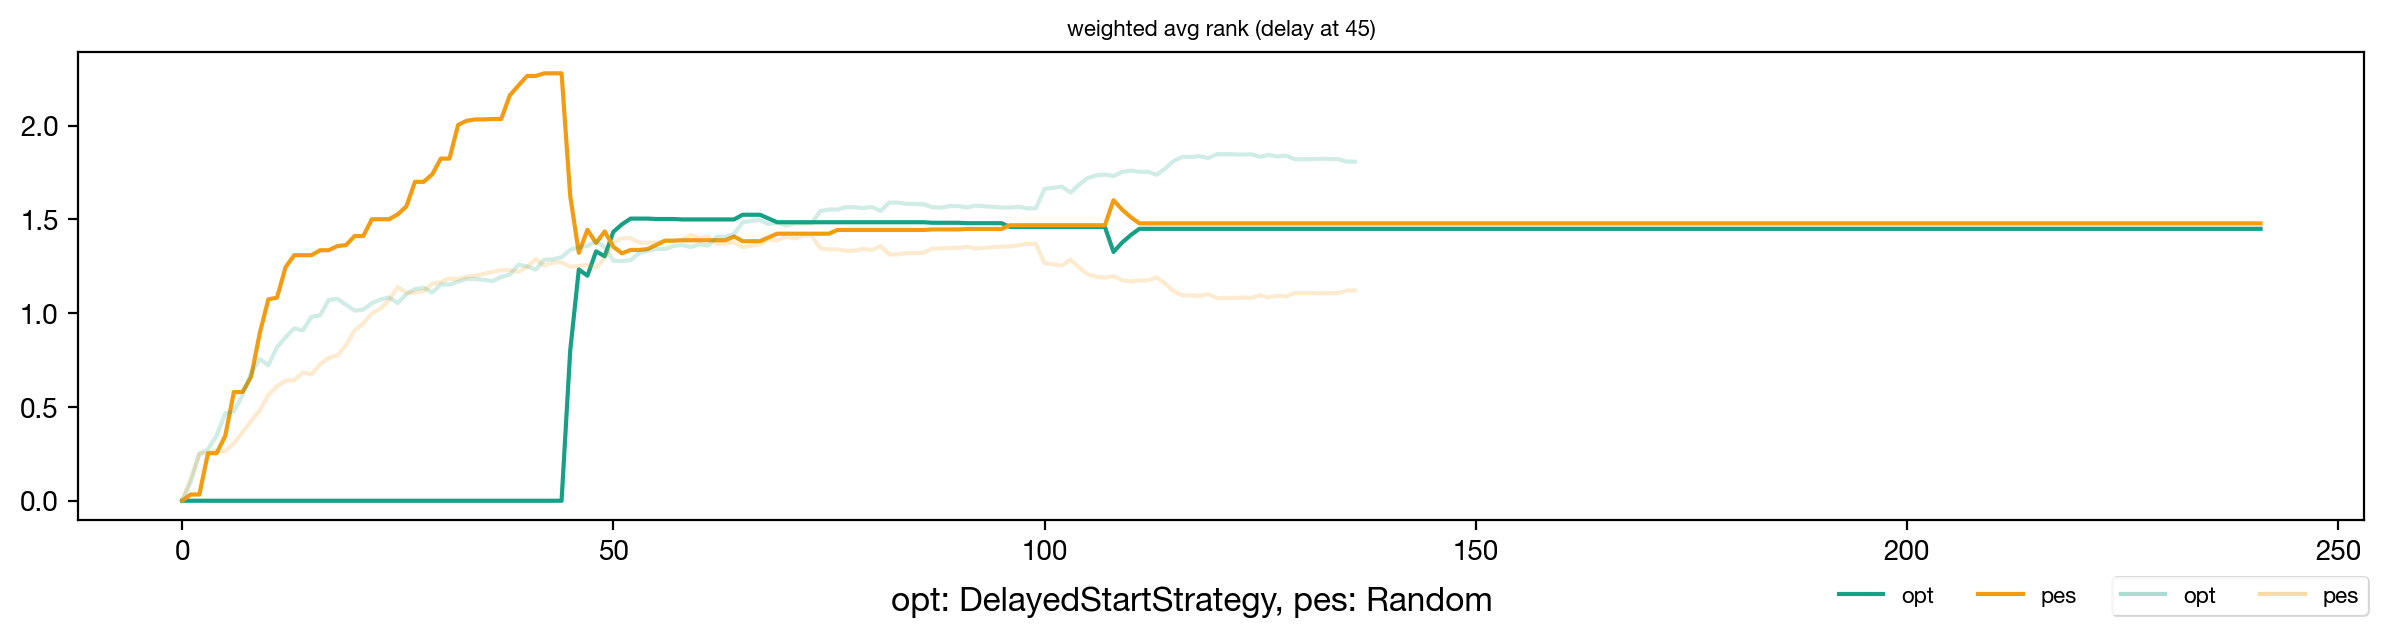

In [14]:
graph = Graph(config)
graph.connect()

def stop_if_greater_cond_factory(steps_to_stop_after_overcome, group, opponent_group):
  max_steps = min([c for _, c in groups_count.items()])

  def stop_if_greater(agent): 
    wavgrank_val, _ = results_analysis(graph, config)
    our_val = wavgrank_val[group]
    other_val = wavgrank_val[opponent_group]
    if our_val < other_val or agent.steps_count > max_steps:
      return True
    return False

  return stop_if_greater

disinformer_strategy = RandomStrategy(config["datavoids"][0])
mitigator_strategy = DelayedStartStrategy(
  ConditionalAttackStrategy(
    GreedyStrategy(config["datavoids"][0]), 
    stop_if_greater_cond_factory(10, config['mitigator_keyword'], config['disinformer_keyword'])
  ), 
  steps_delay
)

output_name = run_simple_simulation(
  keyword, 
  mitigator_strategy, 
  disinformer_strategy, 
  'delayed_strategy_choice_step' + str(steps_delay) + '_' + disinformer_strategy.get_strategy_name() + '_' + mitigator_strategy.get_strategy_name(), 
  config,
  mute_output=True,
  number_of_runs=runs,
  delete_results_if_exist=True
)
steps_per_strategy, strategies, _ = get_output(config, output_name)
steps_per_strategy_base, strategies_base, _ = get_output(config, outputs["rnd_rnd"])
plot_results_for_datavoids_steps_per_strategy_and_base(
  strategies[0], 
  strategies_base[0], 
  config["datavoids"][0], 
  datavoids_steps_per_strategy, 
  datavoids_steps_per_strategy_base, 
  steps_per_strategy,
  steps_per_strategy_base,
  config,
  title_extra= f'(delay at {steps_delay})'
)

graph.close()

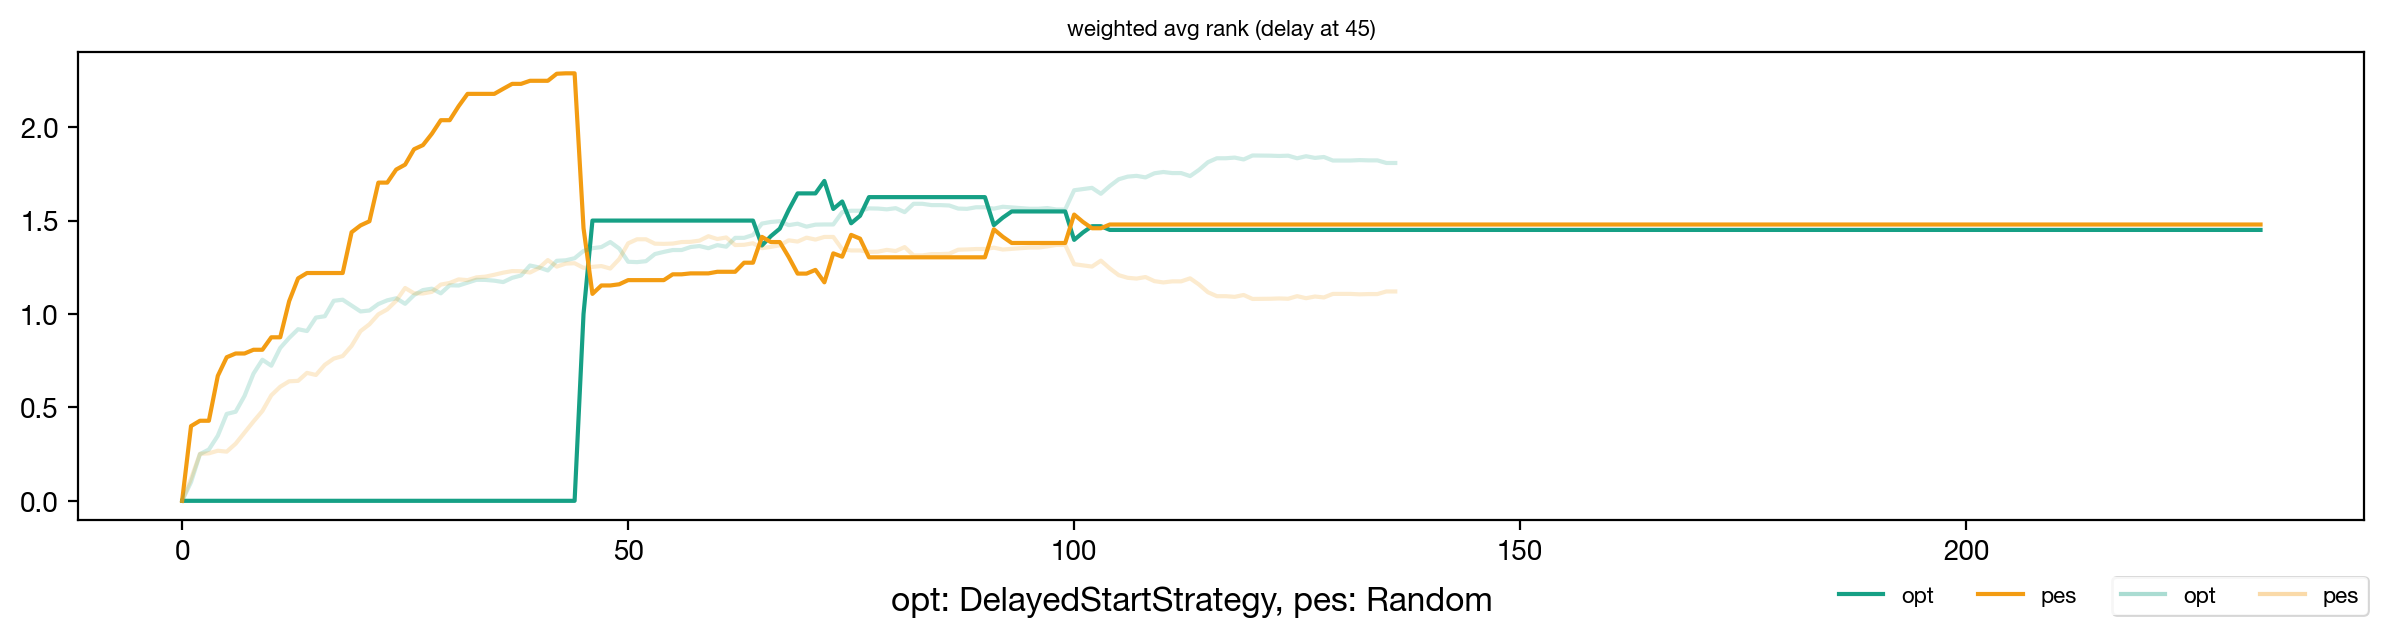

In [15]:
graph = Graph(config)
graph.connect()

def stop_if_greater_cond_factory(steps_to_stop_after_overcome, group, opponent_group, overcome_factor=0.1):
  max_steps = min([c for _, c in groups_count.items()])

  def stop_if_greater(agent): 
    wavgrank_val, _ = results_analysis(graph, config)
    our_val = wavgrank_val[group]
    other_val = wavgrank_val[opponent_group]
    if our_val < (other_val * (1 + overcome_factor)) or agent.steps_count > max_steps:
      return True
    return False

  return stop_if_greater

disinformer_strategy = RandomStrategy(config["datavoids"][0])
mitigator_strategy = DelayedStartStrategy(
  ConditionalAttackStrategy(
    GreedyStrategy(config["datavoids"][0]), 
    stop_if_greater_cond_factory(10, config['mitigator_keyword'], config['disinformer_keyword'])
  ), 
  steps_delay
)

output_name = run_simple_simulation(
  keyword, 
  mitigator_strategy, 
  disinformer_strategy, 
  'delayed_strategy_choice_step' + str(steps_delay) + '_' + disinformer_strategy.get_strategy_name() + '_' + mitigator_strategy.get_strategy_name(), 
  config,
  mute_output=True,
  number_of_runs=runs,
  delete_results_if_exist=True
)
steps_per_strategy, strategies, _ = get_output(config, output_name)
steps_per_strategy_base, strategies_base, _ = get_output(config, outputs["rnd_rnd"])
plot_results_for_datavoids_steps_per_strategy_and_base(
  strategies[0], 
  strategies_base[0], 
  config["datavoids"][0], 
  datavoids_steps_per_strategy, 
  datavoids_steps_per_strategy_base, 
  steps_per_strategy,
  steps_per_strategy_base,
  config,
  title_extra= f'(delay at {steps_delay})'
)

graph.close()